<a href="https://colab.research.google.com/github/April417/dissertation_/blob/main/firm_distress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# environment


In [ ]:
!pip install autogluon  # autogluon==0.3.1
from autogluon.tabular import TabularDataset, TabularPredictor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.layers import Dense
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings 
warnings.filterwarnings('ignore')

np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.max_columns', None)

# read the data

In [ ]:
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/dissertation/all_predrs_tic_permno_dlrsn.csv')

Mounted at /drive


In [ ]:
df_all = df.copy()
df_all.head()

,Unnamed: 0,permno,yyyymm,tic,fyear,dlrsn,zerotradeAlt12,zerotradeAlt1,zerotrade,XFIN,VolumeTrend,VolSD,VolMkt,VarCF,UpRecomm,TrendFactor,TotalAccruals,Tax,tang,SurpriseRD,std_turn,Spinoff,SP,SmileSlope,skew1,sinAlgo,ShortInterest,ShareVol,ShareRepurchase,ShareIss5Y,ShareIss1Y,sfe,RoE,roaq,RIO_Volatility,RIO_Turnover,RIO_MB,RIO_Disp,RevenueSurprise,REV6,ReturnSkew3F,ReturnSkew,retConglomerate,ResidualMomentum,Recomm_ShortInterest,realestate,RDS,RDIPO,RDcap,RDAbility,RD,PS,ProbInformedTrading,PriceDelayTstat,PriceDelaySlope,PriceDelayRsq,PredictedFE,PctTotAcc,PctAcc,PayoutYield,PatentsRD,OScore,OrgCap,OrderBacklogChg,OrderBacklog,OptionVolume2,OptionVolume1,OPLeverage,OperProfRD,OperProf,NumEarnIncrease,NOA,NetPayoutYield,NetEquityFinance,NetDebtPrice,NetDebtFinance,MS,MRreversal,MomVol,MomSeasonShort,MomSeason16YrPlus,MomSeason11YrPlus,MomSeason06YrPlus,MomSeason,MomRev,MomOffSeason16YrPlus,MomOffSeason11YrPlus,MomOffSeason06YrPlus,MomOffSeason,Mom6mJunk,Mom6m,Mom12mOffSeason,Mom12m,MeanRankRevGrowth,MaxRet,LRreversal,Leverage,IO_ShortInterest,iomom_supp,iomom_cust,InvGrowth,InvestPPEInv,Investment,IntMom,IntanSP,IntanEP,IntanCFP,IntanBM,IndRetBig,IndMom,IndIPO,Illiquidity,IdioVolAHT,IdioVol3F,IdioRisk,hire,High52,HerfBE,HerfAsset,Herf,GrSaleToGrOverhead,GrSaleToGrInv,GrLTNOA,grcapx3y,grcapx,GrAdExp,GP,Governance,Frontier,FR,ForecastDispersion,FirmAgeMom,FirmAge,fgr5yrLag,FEPS,ExclExp,ExchSwitch,EquityDuration,EP,EntMult,EBM,EarnSupBig,EarningsSurprise,EarningsStreak,EarningsForecastDisparity,EarningsConsistency,DownRecomm,DolVol,dNoa,DivYieldST,DivSeason,DivOmit,DivInit,DelNetFin,DelLTI,DelFINL,DelEqu,DelDRC,DelCOL,DelCOA,DelBreadth,DebtIssuance,CustomerMomentum,CredRatDG,Coskewness,CoskewACX,ConvDebt,ConsRecomm,CompositeDebtIssuance,CompEquIss,CitationsRD,ChTax,ChNWC,ChNNCOA,ChNAnalyst,ChInvIA,ChInv,ChForecastAccrual,ChEQ,ChAssetTurnover,ChangeInRecommendation,cfp,CF,CBOperProf,CashProd,Cash,BrandInvest,BPEBM,BookLeverage,BMdec,BM,BidAskSpread,betaVIX,BetaTailRisk,BetaLiquidityPS,BetaFP,Beta,AssetGrowth,AOP,AnnouncementReturn,AnalystValue,AnalystRevision,AM,AgeIPO,AdExp,Activism2,Activism1,AccrualsBM,Accruals,AbnormalAccruals
0,0,10001,200912,EGAS,2009.0,1,2.386365e-01,8.278497e-08,1.590910e-01,-0.001004,-0.008347,0.141468,0.036499,0.000556,0.0,0.219252,0.009216,1.000000,0.685558,0.0,0.032221,0.0,1.969554,0.000183,0.055786,0.0,193.30429,0.0,0.0,1.516930,-0.011037,0.063447,0.111263,-0.002779,4.0,3.0,3.0,4.0,0.111099,-0.001607,1.717994,1.834892,0.055890,0.000536,1.0,-0.015931,-0.36181,0.0,0.0,0.399101,0.02749,5.0,0.269558,1.524958,0.844344,0.372298,0.048709,0.577621,-0.693633,0.029592,0.0,0.0,-0.298227,-0.003431,0.27979,0.792468,275.300735,1.044316,0.136345,0.234304,2.0,0.501127,0.003907,0.000000,0.598464,0.000000,5.0,-0.323432,6.0,0.034140,-0.020941,0.000724,0.022766,-0.009969,1.0,0.016702,0.006383,0.004087,0.022171,0.062002,0.062002,0.005549,0.139181,2591.7334,0.128878,0.024143,1.018226,84.831001,1.0,1.0,0.035142,0.031953,0.932564,0.216345,1.039085,0.304395,0.277354,0.617186,0.063177,0.112939,0.0,1.066876e-06,0.026553,0.034824,0.038349,0.000000,1.119553,0.221036,0.226444,0.205307,-0.00082,0.025019,0.021858,1.041302,0.087248,0.05068,0.122529,9.0,-0.040462,-0.007084,0.045455,0.024194,225.0,14.38,1.05,-0.25,1.0,15.027798,0.090488,7.728773,0.177420,-0.517216,0.004570,0.000621,-1.388889,0.108744,0.0,1.083888,0.024353,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013962,0.001724,0.003659,0.004011,0.103,0.0,0.012035,0.0,-0.341832,-0.183837,0.0,0.0,0.063456,-0.798757,0.0,0.000004,-0.000778,0.000550,0.0,-0.351103,0.000000,0.0,1.070637,-0.004555,0.0,0.070530,0.119016,-0.038974,-6.954918,0.089524,245.09174,0.492285,2.500462,0.623747,-0.400918,0.007101,-0.030161,0.272279,0.079790,0.301282,0.319282,0.062494,0.347414,-0.027692,0.646853,1.000000,1.687931,10.0,0.007911,7.318425,15.0,0.0,-0.026794,0.009396
1,1,10001,201012,EGAS,2010.0,1,4.150665e-08,1.000040e-08,4.676126e-08,-0.028985,0.037571,0.237307,0.047156,0.000342,0.0,0.219252,0.037629,

In [ ]:
df_all.isnull().sum().sum()

# no missing data

0

In [ ]:
df_all.drop(['Unnamed: 0', 'tic', 'fyear'], axis = 1, inplace = True)
df_all['dlrsn'].value_counts()

0     83106
1     57219
10     5689
3      2519
7      2289
4      1332
9       796
5       180
2       160
20       95
Name: dlrsn, dtype: int64

In [ ]:
df_all.loc[~((df_all['dlrsn'] == 2) | (df_all['dlrsn'] == 3)), 'dlrsn'] = 0
df_all.loc[(df_all['dlrsn'] == 2) | (df_all['dlrsn'] == 3), 'dlrsn'] = 1

In [ ]:
# the total number of company
len(df_all.permno.unique())

20123

### bankruptcy number and percentage

In [ ]:
bankruptcy = df_all[df_all['dlrsn'] == 1]
bankruptcy_time = bankruptcy.groupby('permno')['yyyymm', 'dlrsn'].last()
bankruptcy_time['yyyymm'] = pd.to_datetime(bankruptcy_time['yyyymm'], format='%Y%m')
bankruptcy_time['year'] = bankruptcy_time.reset_index().set_index('yyyymm').index.year

bankruptcy_time['year'].value_counts().sort_index()

1990    20
1991    11
1992     6
1993    20
1994     2
1995     4
1996     6
1997    17
1998    14
1999    17
2000     4
2001     3
2002     9
2003     9
2004    17
2005     3
2006     7
2007    47
2008    89
2009    55
2010    34
2011     7
2012    47
2013    72
2014    67
2015    98
2016     1
2018     5
2019    12
2020    35
2021     8
Name: year, dtype: int64

In [ ]:
bins = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
cut = pd.cut(bankruptcy_time['year'], bins, right = False)
bankruptcy_number = bankruptcy_time.groupby(cut)['yyyymm'].count()
bankruptcy_number

year
[1990, 1995)     59
[1995, 2000)     58
[2000, 2005)     42
[2005, 2010)    201
[2010, 2015)    227
[2015, 2020)    116
Name: yyyymm, dtype: int64

In [ ]:
all_time = df_all.copy()
all_time['yyyymm'] = pd.to_datetime(all_time['yyyymm'], format='%Y%m')
all_time['year'] = all_time.reset_index().set_index('yyyymm').index.year
cut_ = pd.cut(all_time['year'], bins, right = False)
all_com = all_time.groupby(cut_)['permno'].unique()
all_num = [len(all_com[i]) for i in range(6)]
all_num = pd.Series(all_num, index = all_com.index)
all_num

year
[1990, 1995)    5409
[1995, 2000)    7641
[2000, 2005)    6322
[2005, 2010)    6352
[2010, 2015)    7280
[2015, 2020)    8532
dtype: int64

In [ ]:
bankruptcy_per = bankruptcy_number/all_num
display(bankruptcy_per)

year
[1990, 1995)    0.010908
[1995, 2000)    0.007591
[2000, 2005)    0.006643
[2005, 2010)    0.031644
[2010, 2015)    0.031181
[2015, 2020)    0.013596
dtype: float64

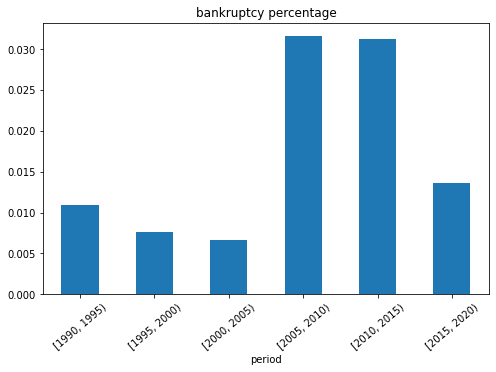

In [ ]:
ax = bankruptcy_per.plot(kind = 'bar', figsize = (8, 5), xlabel = 'period', title = 'bankruptcy percentage', rot = 40)
fig = ax.get_figure()
fig.savefig('/drive/My Drive/dissertation/bankruptcy percentage.pdf', bbox_inches = 'tight')

In [ ]:
bankruptcy = df_all[df_all['dlrsn'] == 1]
bankruptcy_time = bankruptcy.groupby('permno')['yyyymm', 'dlrsn'].last()
bankruptcy_time['yyyymm'] = pd.to_datetime(bankruptcy_time['yyyymm'], format='%Y%m')
bankruptcy_time['year'] = bankruptcy_time.reset_index().set_index('yyyymm').index.year

bankruptcy_number = bankruptcy_time['year'].value_counts().sort_index()
bankruptcy_number

1990    20
1991    11
1992     6
1993    20
1994     2
1995     4
1996     6
1997    17
1998    14
1999    17
2000     4
2001     3
2002     9
2003     9
2004    17
2005     3
2006     7
2007    47
2008    89
2009    55
2010    34
2011     7
2012    47
2013    72
2014    67
2015    98
2016     1
2018     5
2019    12
2020    35
2021     8
Name: year, dtype: int64

In [ ]:
all_time = df_all.copy()
all_time['yyyymm'] = pd.to_datetime(all_time['yyyymm'], format='%Y%m')
all_time['year'] = all_time.reset_index().set_index('yyyymm').index.year
# cut_ = pd.cut(all_time['year'], bins, right = False)
all_com = all_time.groupby('year')['permno'].unique()
all_num = [len(all_com[i]) for i in range(1990,2022)]
all_num = pd.Series(all_num, index = all_com.index)
all_num

year
1990    2727
1991    2995
1992    3717
1993    4038
1994    1891
1995    1674
1996    4604
1997    5336
1998    4981
1999    4935
2000    1520
2001    4210
2002    4288
2003    4674
2004    4452
2005    1592
2006    1316
2007    4663
2008    5146
2009    4909
2010    4920
2011    1401
2012    4916
2013    5165
2014    5870
2015    5959
2016    1098
2017    1007
2018    6162
2019    6483
2020    7238
2021    6590
dtype: int64

1990    0.007334
1991    0.003673
1992    0.001614
1993    0.004953
1994    0.001058
1995    0.002389
1996    0.001303
1997    0.003186
1998    0.002811
1999    0.003445
2000    0.002632
2001    0.000713
2002    0.002099
2003    0.001926
2004    0.003819
2005    0.001884
2006    0.005319
2007    0.010079
2008    0.017295
2009    0.011204
2010    0.006911
2011    0.004996
2012    0.009561
2013    0.013940
2014    0.011414
2015    0.016446
2016    0.000911
2017         NaN
2018    0.000811
2019    0.001851
2020    0.004836
2021    0.001214
dtype: float64

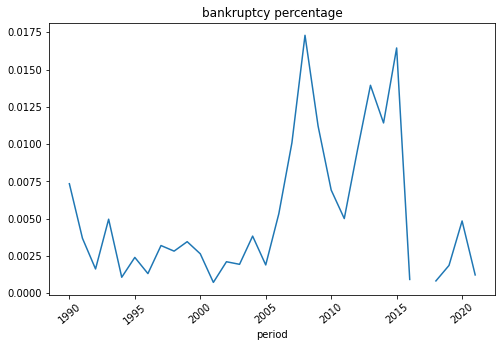

In [ ]:
bankruptcy_per = bankruptcy_number/all_num
display(bankruptcy_per)
ax = bankruptcy_per.plot(figsize = (8, 5), xlabel = 'period', title = 'bankruptcy percentage', rot = 40)

In [ ]:
# the length of time an insolvent company has been in operation
operation_year = bankruptcy.groupby('permno')['dlrsn'].count()
operation_year.value_counts().sort_index()

1     205
2     164
3     122
4      76
5      47
6      27
7      34
8      17
9       5
10      9
11      8
12     14
13      4
14      4
15      2
16      1
17      2
18      1
19      1
23      1
26      1
40      1
Name: dlrsn, dtype: int64

### descriptive statistics

In [ ]:
top10 = df_all[['DolVol','VolMkt', 'zerotradeAlt1', 'CoskewACX', 'High52', 'MaxRet', 'zerotrade', 'PriceDelaySlope', 'BidAskSpread', 'Coskewness']]
top10.describe().T

,count,mean,std,min,25%,50%,75%,max
DolVol,153385.0,3.034660,2.875496,-1.003702e+01,1.001789e+00,3.002938e+00,5.122377e+00,13.719069
VolMkt,153385.0,0.206746,0.886693,0.000000e+00,4.045789e-02,8.627618e-02,1.685714e-01,70.010521
zerotradeAlt1,153385.0,1.004256,2.978533,4.076031e-12,1.341752e-08,3.058342e-08,9.697437e-08,20.086960
CoskewACX,153385.0,-0.156395,0.244687,-2.103338e+00,-2.466027e-01,-1.188605e-01,-1.651780e-02,1.372095
High52,153385.0,0.802431,0.232901,1.237500e-03,6.790299e-01,8.613843e-01,9.666666e-01,6.642988
MaxRet,153385.0,0.064323,0.097195,-1.245421e-01,2.415463e-02,4.166667e-02,7.411209e-02,9.983515
zerotrade,153385.0,0.932574,2.675913,3.219148e-11,1.459424e-08,3.210656e-08,1.724477e-07,19.669680
PriceDelaySlope,153385.0,0.672169,107.374959,-1.452667e+04,-1.909193e-01,3.132311e-01,9.660411e-01,28863.641000
BidAskSpread,153385.0,0.013751,0.022281,8.679322e-07,4.456829e-03,8.155064e-03,1.560822e-02,1.230769
Coskewness,153385.0,-0.273316,0.340011,-3.764499e+00,-4.305972e-01,-2.310408e-01,-7.198499e-02,1.936098


In [ ]:
top10.median()

DolVol             3.002938e+00
VolMkt             8.627618e-02
zerotradeAlt1      3.058342e-08
CoskewACX         -1.188605e-01
High52             8.613843e-01
MaxRet             4.166667e-02
zerotrade          3.210656e-08
PriceDelaySlope    3.132311e-01
BidAskSpread       8.155064e-03
Coskewness        -2.310408e-01
dtype: float64

In [ ]:
top10.skew()

DolVol              -0.040078
VolMkt              28.073264
zerotradeAlt1        3.668810
CoskewACX           -1.520673
High52              -0.521090
MaxRet              22.828517
zerotrade            3.605116
PriceDelaySlope    153.035814
BidAskSpread        12.379707
Coskewness          -0.765761
dtype: float64

In [ ]:
from scipy.stats import kstest
kstest(top10['Coskewness'], 'norm')

KstestResult(statistic=0.37286825017429803, pvalue=0.0)

In [ ]:
from scipy.stats import shapiro
shapiro(top10['Coskewness'])

ShapiroResult(statistic=0.9538572430610657, pvalue=0.0)

In [ ]:
top10.corr()

,DolVol,VolMkt,zerotradeAlt1,CoskewACX,High52,MaxRet,zerotrade,PriceDelaySlope,BidAskSpread,Coskewness
DolVol,1.000000,0.155715,-0.518918,-0.173772,0.131709,-0.184846,-0.541477,-0.004882,-0.341358,-0.000810
VolMkt,0.155715,1.000000,-0.058019,0.011485,-0.156510,0.048879,-0.060903,-0.000816,0.002347,0.043815
zerotradeAlt1,-0.518918,-0.058019,1.000000,0.117489,0.004177,0.079900,0.893640,0.001017,0.287690,-0.010132
CoskewACX,-0.173772,0.011485,0.117489,1.000000,-0.086955,0.065519,0.125834,0.003689,0.109920,0.140962
High52,0.131709,-0.156510,0.004177,-0.086955,1.000000,-0.245587,-0.001221,0.001578,-0.345621,0.078496
MaxRet,-0.184846,0.048879,0.079900,0.065519,-0.245587,1.000000,0.092817,-0.001404,0.437422,-0.034171
zerotrade,-0.541477,-0.060903,0.893640,0.125834,-0.001221,0.092817,1.000000,0.004357,0.309558,-0.013845
PriceDelaySlope,-0.004882,-0.000816,0.001017,0.003689,0.001578,-0.001404,0.004357,1.000000,0.002500,0.000390
BidAskSpread,-0.341358,0.002347,0.287690,0.109920,-0.345621,0.437422,0.309558,0.002500,1.000000,-0.027682
Coskewness,-0.000810,0.043815,-0.010132,0.140962,0.078496,-0.034171,-0.013845,0.000390,-0.027682,1.000000


# Ensemble

### extracting the data

In [ ]:
def extraction(n_year):

  new_data = []
  # 财务困境前3年来预测
  for (stock), _df in df_all.groupby(['permno']):
      if _df.shape[0] >= n_year:
        new_data.append(_df.iloc[-n_year])
  new_df = pd.DataFrame(new_data)
  X = new_df.drop(['permno', 'yyyymm', 'dlrsn'], axis = 1)
  y = new_df['dlrsn']
  return X, y

In [ ]:
X, y = extraction(3)
y.value_counts()
# highly imbalanced data

0.0    14633
1.0      357
Name: dlrsn, dtype: int64

### oversampling - SMOTE

In [ ]:
def oversampling(X, y, sampling_ratio):
  sm = SMOTE(random_state=0, sampling_strategy = sampling_ratio)
  X_ov, y_ov = sm.fit_resample(X, y)
  return X_ov, y_ov

In [ ]:
X_ov, y_ov = oversampling(X, y, 0.8)
y_ov.value_counts()

# 尝试不同的ratio

0.0    14633
1.0    11706
Name: dlrsn, dtype: int64

## Autogluon

### model

In [ ]:
X, y = extraction(3)
# X = X[['DolVol', 'zerotrade', 'VolMkt', 'High52', 'ShareRepurchase', 'zerotradeAlt1', 'zerotradeAlt12',
      #  'CoskewACX', 'ResidualMomentum', 'Illiquidity', 'Coskewness', 'MaxRet', 'IdioVol3F', 'ReturnSkew3F',
      #  'PriceDelaySlope', 'VolumeTrend', 'betaVIX', 'VolSD', 'ShareVol', 'ReturnSkew']]
X_ov, y_ov = oversampling(X, y, 1)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)

train_data_tab = TabularDataset(data_train)
label = 'dlrsn'
model = TabularPredictor(label=label)
predictor = model.fit(train_data_tab)

No path specified. Models will be saved in: "AutogluonModels/ag-20220804_083739/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220804_083739/"
AutoGluon Version:  0.5.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    20486
Train Data Columns: 204
Label Column: dlrsn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10762.33 MB
	Train Data (Original)  Memory Usage: 33.43 MB (0.3% of available memory)
	Inferring data type of eac

[1000]	valid_set's binary_error: 0.00829673


	0.9917	 = Validation score   (accuracy)
	25.19s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM ...
	0.9907	 = Validation score   (accuracy)
	26.21s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9873	 = Validation score   (accuracy)
	21.74s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9868	 = Validation score   (accuracy)
	31.75s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9893	 = Validation score   (accuracy)
	109.71s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9863	 = Validation score   (accuracy)
	8.3s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9863	 = Validation score   (accuracy)
	8.61s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9815	 = Validation score   (accuracy)
	27.04s	 = Training   runtime


In [ ]:
# test
test_data_tab = TabularDataset(data_test)
preds = predictor.predict(test_data_tab)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4350
         1.0       0.98      1.00      0.99      4430

    accuracy                           0.99      8780
   macro avg       0.99      0.99      0.99      8780
weighted avg       0.99      0.99      0.99      8780



In [ ]:
confusion_matrix(y_test, preds)

array([[4264,   86],
       [  11, 4419]])

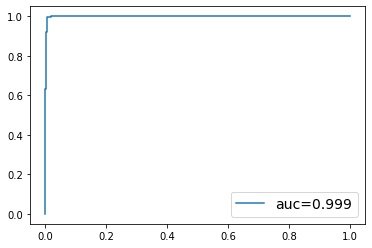

In [ ]:
from sklearn import metrics

preds_prob = predictor.predict_proba(test_data_tab, as_multiclass=False)

# roc
fpr, tpr, _ = metrics.roc_curve(y_test.values,  preds_prob.values)
auc = round(metrics.roc_auc_score(y_test.values, preds_prob.values),4)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4, fontsize=14)
plt.show()

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.995120       2.470482  179.921752                0.004801           1.188458            2       True         14
1         LightGBMLarge   0.992679       0.074221   31.879509                0.074221          31.879509            1       True         13
2            LightGBMXT   0.991703       0.115585   18.917910                0.115585          18.917910            1       True          3
3              LightGBM   0.990727       0.089458   19.451578                0.089458          19.451578            1       True          4
4              CatBoost   0.989263       0.016484   98.964082                0.016484          98.964082            1       True          7
5               XGBoost   0.988775       0.051137   14.464272                0.051137          14.

{'leaderboard':                   model  score_val  pred_time_val    fit_time  \
 0   WeightedEnsemble_L2   0.995120       2.470482  179.921752   
 1         LightGBMLarge   0.992679       0.074221   31.879509   
 2            LightGBMXT   0.991703       0.115585   18.917910   
 3              LightGBM   0.990727       0.089458   19.451578   
 4              CatBoost   0.989263       0.016484   98.964082   
 5               XGBoost   0.988775       0.051137   14.464272   
 6      RandomForestGini   0.987311       0.209292   21.621940   
 7      RandomForestEntr   0.986823       0.209350   27.052079   
 8       NeuralNetFastAI   0.986335       0.122207   36.477934   
 9        ExtraTreesGini   0.986335       0.208847    9.986728   
 10       ExtraTreesEntr   0.986335       0.209297    9.974136   
 11       NeuralNetTorch   0.984871       0.162318   51.624937   
 12       KNeighborsDist   0.889214       1.478995    0.102757   
 13       KNeighborsUnif   0.881406       1.472502    0.11006

In [ ]:
predictor.leaderboard(train_data_tab,extra_info=True, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,num_models,num_models_w_ancestors,memory_size,memory_size_w_ancestors,memory_size_min,memory_size_min_w_ancestors,num_ancestors,num_descendants,model_type,child_model_type,hyperparameters,hyperparameters_fit,ag_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L2,0.999463,0.995120,34.309477,2.470482,179.921752,0.008290,0.004801,1.188458,2,True,14,7,1,8,4526,179932731,4526,84088711,7,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[NeuralNetFastAI, RandomForestGini, KNeighborsDist, RandomForestEntr, LightGBMLarge, NeuralNetTorch, ExtraTreesEntr]",{'ensemble_size': 100},{'ensemble_size': 12},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[NeuralNetFastAI, RandomForestGini, KNeighborsDist, RandomForestEntr, LightGBMLarge, NeuralNetTorch, ExtraTreesEntr]",[]
1,LightGBMLarge,0.999170,0.992679,0.711989,0.074221,31.879509,0.711989,0.074221,31.879509,1,True,13,203,1,1,4874042,4874042,4874042,4874042,0,1,LGBModel,None,"{'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5}",{'num_boost_round': 344},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None}","[zerotradeAlt12, zerotradeAlt1, zerotrade, XFIN, VolumeTrend, VolSD, VolMkt, VarCF, UpRecomm, TrendFactor, TotalAccruals, Tax, tang, SurpriseRD, std_turn, Spinoff, SP, SmileSlope, skew1, sinAlgo, ShortInterest, ShareVol, ShareRepurchase, ShareIss5Y, ShareIss1Y, sfe, RoE, roaq, RIO_Volatility, RIO_Turnover, RIO_MB, RIO_Disp, RevenueSurprise, REV6, ReturnSkew3F, ReturnSkew, retConglomerate, ResidualMomentum, Recomm_ShortInterest, realestate, RDS, RDIPO, RDcap, RDAbility, RD, PS, ProbInformedTrading, PriceDelayTstat, PriceDelaySlope, PriceDelayRsq, PredictedFE, PctTotAcc, PctAcc, PayoutYield,...",None,None,None,[],[WeightedEnsemble_L2]
2,LightGBM,0.998975,0.990727,0.865782,0.089458,19.451578,0.865782,0.089458,19.451578,1,True,4,203,1,1,2181463,2181463,2181463,2181463,0,0,LGBModel,None,{'learning_rate': 0.05},{'num_boost_round': 613},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None}","[zerotradeAlt12, zerotradeAlt1, zerotrade, XFIN, VolumeTrend, VolSD, VolMkt, VarCF, UpRecomm, TrendFactor, TotalAccruals, Tax, tang, SurpriseRD, std_turn, Spinoff, SP, SmileSlope, skew1, sinAlgo, ShortInterest, ShareVol, ShareRepurchase, ShareIss5Y, ShareIss1Y, sfe, RoE, roaq, RIO_Volatility, RIO_Turnover, RIO_MB, RIO_Disp, RevenueSurprise, REV6, ReturnSkew3F, ReturnSkew, retConglomerat

In [ ]:
predictor.leaderboard(test_data_tab,extra_info=True, silent=True, extra_metrics = ['accuracy', 'precision', 'recall'])

,model,score_test,accuracy,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,num_models,num_models_w_ancestors,memory_size,memory_size_w_ancestors,memory_size_min,memory_size_min_w_ancestors,num_ancestors,num_descendants,model_type,child_model_type,hyperparameters,hyperparameters_fit,ag_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L2,0.992483,0.992483,0.985320,1.000000,0.995120,13.131171,2.470482,179.921752,0.007413,0.004801,1.188458,2,True,14,7,1,8,4526,179932731,4526,84088711,7,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[NeuralNetFastAI, RandomForestGini, KNeighborsDist, RandomForestEntr, LightGBMLarge, NeuralNetTorch, ExtraTreesEntr]",{'ensemble_size': 100},{'ensemble_size': 12},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[NeuralNetFastAI, RandomForestGini, KNeighborsDist, RandomForestEntr, LightGBMLarge, NeuralNetTorch, ExtraTreesEntr]",[]
1,LightGBMLarge,0.990547,0.990547,0.984832,0.996614,0.992679,0.337326,0.074221,31.879509,0.337326,0.074221,31.879509,1,True,13,203,1,1,4874042,4874042,4874042,4874042,0,1,LGBModel,None,"{'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5}",{'num_boost_round': 344},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None}","[zerotradeAlt12, zerotradeAlt1, zerotrade, XFIN, VolumeTrend, VolSD, VolMkt, VarCF, UpRecomm, TrendFactor, TotalAccruals, Tax, tang, SurpriseRD, std_turn, Spinoff, SP, SmileSlope, skew1, sinAlgo, ShortInterest, ShareVol, ShareRepurchase, ShareIss5Y, ShareIss1Y, sfe, RoE, roaq, RIO_Volatility, RIO_Turnover, RIO_MB, RIO_Disp, RevenueSurprise, REV6, ReturnSkew3F, ReturnSkew, retConglomerate, ResidualMomentum, Recomm_ShortInterest, realestate, RDS, RDIPO, RDcap, RDAbility, RD, PS, ProbInformedTrading, PriceDelayTstat, PriceDelaySlope, PriceDelayRsq, PredictedFE, PctTotAcc, PctAcc, PayoutYield,...",None,None,None,[],[WeightedEnsemble_L2]
2,LightGBMXT,0.989977,0.989977,0.981375,0.999097,0.991703,0.486418,0.115585,18.917910,0.486418,0.115585,18.917910,1,True,3,203,1,1,2865534,2865534,2865534,2865534,0,0,LGBModel,None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 808},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None}","[zerotradeAlt12, zerotradeAlt1, zerotrade, XFIN, VolumeTrend, VolSD, VolMkt, VarCF, UpRecomm, TrendFactor, TotalAccruals, Tax, tang, SurpriseRD, std_turn, Spinoff, SP, SmileSlope, skew1, sinAlgo, ShortInterest, ShareVol, ShareRepurchase, ShareIss5Y, ShareIs

In [ ]:
fea_impor = predictor.feature_importance(train_data_tab)

These features in provided data are not utilized by the predictor and will be ignored: ['ChNAnalyst']
Computing feature importance via permutation shuffling for 203 features using 5000 rows with 5 shuffle sets...
	7959.67s	= Expected runtime (1591.93s per shuffle set)
	6833.33s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [ ]:
fea_impor.head(20)

,importance,stddev,p_value,n,p99_high,p99_low
DolVol,0.02420,0.001738,0.000003,5,0.027778,0.020622
zerotrade,0.01408,0.001425,0.000012,5,0.017015,0.011145
VolMkt,0.00588,0.001346,0.000308,5,0.008652,0.003108
High52,0.00484,0.001178,0.000390,5,0.007266,0.002414
ShareRepurchase,0.00376,0.000669,0.000116,5,0.005138,0.002382
zerotradeAlt1,0.00348,0.000415,0.000024,5,0.004334,0.002626
zerotradeAlt12,0.00340,0.000735,0.000246,5,0.004913,0.001887
CoskewACX,0.00296,0.000829,0.000668,5,0.004668,0.001252
ResidualMomentum,0.00204,0.000410,0.000185,5,0.002884,0.001196
Illiquidity,0.00148,0.000540,0.001801,5,0.002593,0.000367


### different sampling ratio when the year is 3

In [ ]:
# take an example of previous 3 year data
X, y = extraction(3)

ratio = [0.6, 0.7, 0.8, 0.9, 1]

model = []
label = 'dlrsn'
for i in range(len(ratio)):
  model.append(TabularPredictor(label=label))

cm_train = []
cm_test = []
for i in range(len(ratio)):
  X_ov, y_ov = oversampling(X, y, ratio[i])
  X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

  data_train = X_train.join(y_train)
  data_test = X_test.join(y_test)
  train_data_tab = TabularDataset(data_train)
  test_data_tab = TabularDataset(data_test)


  predictor = model[i].fit(train_data_tab)
  preds_train = predictor.predict(train_data_tab)
  preds_test = predictor.predict(test_data_tab)

  cm_train.append(confusion_matrix(y_train, preds_train))
  cm_test.append(confusion_matrix(y_test, preds_test))

No path specified. Models will be saved in: "AutogluonModels/ag-20220529_162923/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220529_162923-001/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220529_162923-002/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220529_162923-003/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220529_162923-004/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220529_162923/"
AutoGluon Version:  0.4.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    16388
Train Data Columns: 204
Label Column: dlrsn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['

[1000]	valid_set's binary_error: 0.0158633


	0.9841	 = Validation score   (accuracy)
	29.14s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...
	0.9841	 = Validation score   (accuracy)
	23.51s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9817	 = Validation score   (accuracy)
	17.43s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9817	 = Validation score   (accuracy)
	25.58s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9835	 = Validation score   (accuracy)
	205.15s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9805	 = Validation score   (accuracy)
	6.69s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9805	 = Validation score   (accuracy)
	7.52s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9774	 = Validation score   (accuracy)
	21.42s	 = Training   runtime

[1000]	valid_set's binary_error: 0.0183697


	0.9822	 = Validation score   (accuracy)
	39.12s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9776	 = Validation score   (accuracy)
	18.05s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9776	 = Validation score   (accuracy)
	26.18s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9753	 = Validation score   (accuracy)
	65.21s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.977	 = Validation score   (accuracy)
	6.9s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9782	 = Validation score   (accuracy)
	8.91s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9788	 = Validation score   (accuracy)
	23.31s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: XGBoost ...
	0.9811	 = Validation score   (accuracy)
	21.32s	 = Training   runtime
	0.

[1000]	valid_set's binary_error: 0.0130152
[2000]	valid_set's binary_error: 0.00921909
[3000]	valid_set's binary_error: 0.00921909


	0.9913	 = Validation score   (accuracy)
	67.08s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_error: 0.0124729


	0.9881	 = Validation score   (accuracy)
	31.82s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9886	 = Validation score   (accuracy)
	19.73s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9848	 = Validation score   (accuracy)
	27.98s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9745	 = Validation score   (accuracy)
	52.6s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9821	 = Validation score   (accuracy)
	8.72s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9821	 = Validation score   (accuracy)
	9.84s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9751	 = Validation score   (accuracy)
	24.25s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: XGBoost ...
	0.9859	 = Validation score   (accuracy)
	20.2s	 = Training   runtime
	0.

[1000]	valid_set's binary_error: 0.0102722


	0.9908	 = Validation score   (accuracy)
	25.63s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_error: 0.0097586


	0.9902	 = Validation score   (accuracy)
	35.8s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9872	 = Validation score   (accuracy)
	21.4s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9872	 = Validation score   (accuracy)
	29.77s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9851	 = Validation score   (accuracy)
	141.28s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9846	 = Validation score   (accuracy)
	8.22s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9836	 = Validation score   (accuracy)
	8.62s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9861	 = Validation score   (accuracy)
	25.71s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: XGBoost ...
	0.9861	 = Validation score   (accuracy)
	18.24s	 = Training   runtime
	0

[1000]	valid_set's binary_error: 0.00770416


	0.9923	 = Validation score   (accuracy)
	64.59s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.9933	 = Validation score   (accuracy)
	1.28s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 474.78s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220529_162923-003/")
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220529_162923-004/"
AutoGluon Version:  0.4.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    20486
Train Data Columns: 204
Label Column: dlrsn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify probl

[1000]	valid_set's binary_error: 0.00829673


	0.9917	 = Validation score   (accuracy)
	26.12s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...
	0.9907	 = Validation score   (accuracy)
	26.29s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9873	 = Validation score   (accuracy)
	22.98s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9868	 = Validation score   (accuracy)
	31.79s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9893	 = Validation score   (accuracy)
	117.66s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9863	 = Validation score   (accuracy)
	10.58s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9863	 = Validation score   (accuracy)
	13.43s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9849	 = Validation score   (accuracy)
	25.84s	 = Training   runti

In [ ]:
for i in range(len(ratio)):
  print(f'---------the oversampling ratio is {ratio[i]}---------------')
  print(' the confusion matrix for training set is')
  print(cm_train[i])
  print('\n')
  print(' the confusion matrix for testing set is')
  print(cm_test[i])  
  print('\n'*5)

---------the oversampling ratio is 0.6---------------
 the confusion matrix for training set is
[[10197    13]
 [    0  6178]]


 the confusion matrix for testing set is
[[4372   51]
 [  10 2591]]






---------the oversampling ratio is 0.7---------------
 the confusion matrix for training set is
[[10197    62]
 [    3  7151]]


 the confusion matrix for testing set is
[[4285   89]
 [   6 3083]]






---------the oversampling ratio is 0.8---------------
 the confusion matrix for training set is
[[10246    16]
 [    0  8175]]


 the confusion matrix for testing set is
[[4305   66]
 [   0 3531]]






---------the oversampling ratio is 0.9---------------
 the confusion matrix for training set is
[[10278    15]
 [    0  9168]]


 the confusion matrix for testing set is
[[4290   50]
 [   6 3995]]






---------the oversampling ratio is 1---------------
 the confusion matrix for training set is
[[10270    13]
 [    1 10202]]


 the confusion matrix for testing set is
[[4280   70]
 [   9 

### different year

In [ ]:
model_ = []
label = 'dlrsn'
for i in range(5):
  model_.append(TabularPredictor(label=label))

cm_train_ = []
cm_test_ = []
feature = []

r = 0.5

X, y = extraction(1)
X_ov, y_ov = oversampling(X, y, r)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor1 = model_[0].fit(train_data_tab)

preds_train = predictor1.predict(train_data_tab)
preds_test = predictor1.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))
# fea_impor = predictor1.feature_importance(train_data_tab).head(10)
# feature.append(fea_impor)


X, y = extraction(2)
X_ov, y_ov = oversampling(X, y, r)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor2 = model_[1].fit(train_data_tab)

preds_train = predictor2.predict(train_data_tab)
preds_test = predictor2.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))
# fea_impor = predictor2.feature_importance(train_data_tab).head(10)
# feature.append(fea_impor)


X, y = extraction(3)
X_ov, y_ov = oversampling(X, y, r)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor3 = model_[2].fit(train_data_tab)

preds_train = predictor3.predict(train_data_tab)
preds_test = predictor3.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))
# fea_impor = predictor3.feature_importance(train_data_tab).head(10)
# feature.append(fea_impor)


X, y = extraction(4)
X_ov, y_ov = oversampling(X, y, r)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor4 = model_[3].fit(train_data_tab)

preds_train = predictor4.predict(train_data_tab)
preds_test = predictor4.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))
# fea_impor = predictor4.feature_importance(train_data_tab).head(10)
# feature.append(fea_impor)


X, y = extraction(5)
X_ov, y_ov = oversampling(X, y, r)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor5 = model_[4].fit(train_data_tab)

preds_train = predictor5.predict(train_data_tab)
preds_test = predictor5.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))
# fea_impor = predictor5.feature_importance(train_data_tab).head(10)
# feature.append(fea_impor)

No path specified. Models will be saved in: "AutogluonModels/ag-20220627_172719/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_172719-001/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_172719-002/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_172720/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_172720-001/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220627_172719/"
AutoGluon Version:  0.5.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    20401
Train Data Columns: 204
Label Column: dlrsn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1.0, 0.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['bina

[1000]	valid_set's binary_error: 0.0142087


	0.9882	 = Validation score   (accuracy)
	48.83s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.976	 = Validation score   (accuracy)
	22.66s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9745	 = Validation score   (accuracy)
	30.44s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: CatBoost ...
	0.9838	 = Validation score   (accuracy)
	230.72s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.975	 = Validation score   (accuracy)
	12.47s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.977	 = Validation score   (accuracy)
	12.88s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9735	 = Validation score   (accuracy)
	30.17s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: XGBoost ...
	0.9853	 = Validation score   (accuracy)
	28.9s	 = Training   runtime
	0

[1000]	valid_set's binary_error: 0.0174845


	0.9842	 = Validation score   (accuracy)
	27.49s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...
	0.982	 = Validation score   (accuracy)
	24.44s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9724	 = Validation score   (accuracy)
	20.46s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9712	 = Validation score   (accuracy)
	27.28s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.9763	 = Validation score   (accuracy)
	142.86s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9724	 = Validation score   (accuracy)
	10.04s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9712	 = Validation score   (accuracy)
	10.43s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.969	 = Validation score   (accuracy)
	27.66s	 = Training   runtime


In [ ]:
year = [1,2,3,4,5]
for i in range(len(year)):
  print(f'---------the backforward year is {year[i]}---------------')
  print(' the confusion matrix for training set is')
  print(cm_train_[i])
  print(' the confusion matrix for testing set is')
  print(cm_test_[i])
  # print(f'the most 10 important features are')
  # display(feature[i])
  print('\n'*3)

---------the backforward year is 1---------------
 the confusion matrix for training set is
[[13586    15]
 [    4  6796]]
 the confusion matrix for testing set is
[[5745   84]
 [  20 2895]]




---------the backforward year is 2---------------
 the confusion matrix for training set is
[[11770    23]
 [    7  5926]]
 the confusion matrix for testing set is
[[4998   91]
 [  23 2485]]




---------the backforward year is 3---------------
 the confusion matrix for training set is
[[10226    20]
 [    4  5114]]
 the confusion matrix for testing set is
[[4335   52]
 [  20 2178]]




---------the backforward year is 4---------------
 the confusion matrix for training set is
[[8937   10]
 [   0 4467]]
 the confusion matrix for testing set is
[[3775   54]
 [   9 1912]]




---------the backforward year is 5---------------
 the confusion matrix for training set is
[[7185    9]
 [   0 3602]]
 the confusion matrix for testing set is
[[3046   43]
 [   0 1539]]






In [ ]:
model_ = []
label = 'dlrsn'
for i in range(5):
  model_.append(TabularPredictor(label=label))

cm_train_ = []
cm_test_ = []

X, y = extraction(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor1 = model_[0].fit(train_data_tab)

preds_train = predictor1.predict(train_data_tab)
preds_test = predictor1.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))


X, y = extraction(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor2 = model_[1].fit(train_data_tab)

preds_train = predictor2.predict(train_data_tab)
preds_test = predictor2.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))


X, y = extraction(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor3 = model_[2].fit(train_data_tab)

preds_train = predictor3.predict(train_data_tab)
preds_test = predictor3.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))


X, y = extraction(4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor4 = model_[3].fit(train_data_tab)

preds_train = predictor4.predict(train_data_tab)
preds_test = predictor4.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))


X, y = extraction(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

data_train = X_train.join(y_train)
data_test = X_test.join(y_test)
train_data_tab = TabularDataset(data_train)
test_data_tab = TabularDataset(data_test)

predictor5 = model_[4].fit(train_data_tab)

preds_train = predictor5.predict(train_data_tab)
preds_test = predictor5.predict(test_data_tab)
cm_train_.append(confusion_matrix(y_train, preds_train))
cm_test_.append(confusion_matrix(y_test, preds_test))

year = [1,2,3,4,5]
for i in range(len(year)):
  print(f'---------the backforward year is {year[i]}---------------')
  print(' the confusion matrix for training set is')
  print(cm_train_[i])
  print(' the confusion matrix for testing set is')
  print(cm_test_[i])
  print('\n'*2)

No path specified. Models will be saved in: "AutogluonModels/ag-20220627_190547/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_190547-001/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_190547-002/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_190547-003/"
No path specified. Models will be saved in: "AutogluonModels/ag-20220627_190547-004/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220627_190547/"
AutoGluon Version:  0.5.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    14086
Train Data Columns: 204
Label Column: dlrsn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['

---------the backforward year is 1---------------
 the confusion matrix for training set is
[[13590     5]
 [   43   448]]
 the confusion matrix for testing set is
[[5810   25]
 [ 131   71]]



---------the backforward year is 2---------------
 the confusion matrix for training set is
[[11772    43]
 [   80   273]]
 the confusion matrix for testing set is
[[5012   55]
 [  96   53]]



---------the backforward year is 3---------------
 the confusion matrix for training set is
[[10238     2]
 [  185    68]]
 the confusion matrix for testing set is
[[4386    7]
 [  96    8]]



---------the backforward year is 4---------------
 the confusion matrix for training set is
[[8920   22]
 [  97   72]]
 the confusion matrix for testing set is
[[3823   11]
 [  64    8]]



---------the backforward year is 5---------------
 the confusion matrix for training set is
[[7199    4]
 [ 109   14]]
 the confusion matrix for testing set is
[[3075    5]
 [  60    1]]





## XGBoost

In [ ]:
X, y = extraction(3)
# X = X[['zerotradeAlt1', 'DolVol', 'CoskewACX', 'zerotrade', 'IdioVolAHT', 'betaVIX', 'VolMkt', 'Illiquidity', 
#        'PriceDelayRsq', 'Coskewness', 'High52', 'ResidualMomentum', 'PriceDelaySlope', 'BidAskSpread', 'std_turn',
#        'zerotradeAlt12', 'BetaLiquidityPS', 'MaxRet', 'VolSD', 'ReturnSkew']]
X_ov, y_ov = oversampling(X, y, 1)

X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

grid_search_params = {
    'colsample_bytree': [0.5, 0.7, 1],
    'n_estimators': [200],
    'subsample': [0.5, 0.8, 1],
    'max_depth': [3, 4, 5]
}

xg = xgb.XGBClassifier(objective='binary:logistic', seed= 0)

grid = GridSearchCV(estimator=xg, param_grid=grid_search_params, scoring='f1', cv=3, verbose=1)
grid.fit(X_train, y_train, eval_metric = ['error'], verbose=True)

cvres_0 = grid.cv_results_
for f1, params in zip(cvres_0["mean_test_score"], cvres_0["params"]):
    print(f1, params)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9163269752021881 {'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
0.9171890952810262 {'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
0.9106480943025591 {'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
0.9431403487377351 {'colsample_bytree': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
0.9431922060495733 {'colsample_bytree': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
0.9398536302416115 {'colsample_bytree': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1}
0.9601399193497254 {'colsample_bytree': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
0.9589611464066561 {'colsample_bytree': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
0.958515943296033 {'colsample_bytree': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
0.917707960772519 {'colsample_bytree': 0.7, 'm

In [ ]:
pd.DataFrame(cvres_0)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.306617,0.021677,0.056916,0.001041,0.5,3,200,0.5,"{'colsample_bytree': 0.5, 'max_depth': 3, 'n_e...",0.919573,0.918100,0.911308,0.916327,0.003600,25
1,2.354249,0.006629,0.057019,0.000206,0.5,3,200,0.8,"{'colsample_bytree': 0.5, 'max_depth': 3, 'n_e...",0.920745,0.916570,0.914253,0.917189,0.002686,22
2,2.329815,0.006863,0.057920,0.001289,0.5,3,200,1,"{'colsample_bytree': 0.5, 'max_depth': 3, 'n_e...",0.912509,0.911867,0.907568,0.910648,0.002194,27
3,2.962542,0.004862,0.072613,0.001637,0.5,4,200,0.5,"{'colsample_bytree': 0.5, 'max_depth': 4, 'n_e...",0.944998,0.944146,0.940277,0.943140,0.002054,15
4,3.682536,0.451653,0.079760,0.009091,0.5,4,200,0.8,"{'colsample_bytree': 0.5, 'max_depth': 4, 'n_e...",0.944037,0.945618,0.939922,0.943192,0.002401,14
5,3.062381,0.013236,0.071344,0.000309,0.5,4,200,1,"{'colsample_bytree': 0.5, 'max_depth': 4, 'n_e...",0.940262,0.941006,0.938293,0.939854,0.001145,18
6,3.689486,0.018594,0.088599,0.001379,0.5,5,200,0.5,"{'colsample_bytree': 0.5, 'max_depth': 5, 'n_e...",0.961238,0.962371,0.956811,0.960140,0.002399,5
7,3.860314,0.006734,0.088088,0.000400,0.5,5,200,0.8,"{'colsample_bytree': 0.5, 'max_depth': 5, 'n_e...",0.962781,0.960964,0.953139,0.958961,0.004184,7
8,3.836766,0.008688,0.087582,0.000376,0.5,5,200,1,"{'colsample_bytree': 0.5, 'max_depth': 5, 'n_e...",0.961782,0.958297,0.955469,0.958516,0.002582,9
9,2.774151,0.005525,0.057326,0.000584,0.7,3,200,0.5,"{'colsample_bytree': 0.7, 'max_depth': 3, 'n_e...",0.922037,0.918816,0.912271,0.917708,0.004063,20


In [ ]:
grid.best_estimator_

XGBClassifier(max_depth=5, n_estimators=200, seed=0, subsample=0.8)

In [ ]:
preds_train = grid.predict( X_train )
preds_test = grid.predict( X_test )

print('the confusion matrix for training set is')
print(confusion_matrix(y_train, preds_train))
print(f1_score(y_train, preds_train))
print('the confusion matrix for testing set is')
print(confusion_matrix(y_test, preds_test))
print(f1_score(y_test, preds_test))

the confusion matrix for training set is
[[10021   262]
 [   48 10155]]
0.9849660523763337
the confusion matrix for testing set is
[[4156  194]
 [  64 4366]]
0.9713014460511681


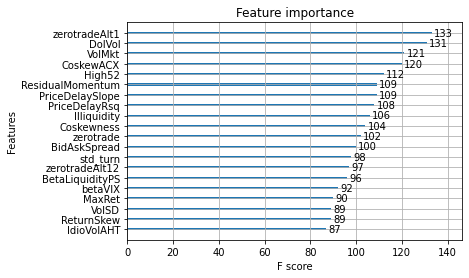

In [ ]:
xgb.plot_importance(grid.best_estimator_, max_num_features = 20)

In [ ]:
X, y = extraction(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

grid_search_params = {
    'colsample_bytree': [0.5, 0.7, 1],
    'n_estimators': [200],
    'subsample': [0.5, 0.8, 1],
    'max_depth': [3, 4, 5]
}

xg = xgb.XGBClassifier(objective='binary:logistic', seed= 0)

grid = GridSearchCV(estimator=xg, param_grid=grid_search_params, scoring='f1', cv=3, verbose=1)
grid.fit(X_train, y_train, eval_metric = ['error'], verbose=True)


preds_train = grid.predict( X_train )
preds_test = grid.predict( X_test )

print('the confusion matrix for training set is')
print(confusion_matrix(y_train, preds_train))
print(f1_score(y_train, preds_train))
print('the confusion matrix for testing set is')
print(confusion_matrix(y_test, preds_test))
print(f1_score(y_test, preds_test))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
the confusion matrix for training set is
[[7203    0]
 [   0  123]]
1.0
the confusion matrix for testing set is
[[3079    1]
 [  59    2]]
0.0625


# Neural network

### single neural network

In [ ]:
X, y = extraction(5)
X_ov, y_ov = oversampling(X, y, 0.5)

X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.3, random_state=0)

param_grid = [
    {'activation': ['logistic', 'relu'], 'hidden_layer_sizes': [5, 10, 30, 50, 70, 100, 120, 150, 180, 200], 
     'max_iter': [2000], 'early_stopping': [True]
     }
]

model = MLPClassifier(random_state = 0)
grid_search = GridSearchCV(model, param_grid, cv = 5,
                          scoring = 'f1',
                          return_train_score = True)
grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for f1, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1, params)

0.014304662858244655 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 5, 'max_iter': 2000}
0.014309170467729929 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 10, 'max_iter': 2000}
0.009339207889965794 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 30, 'max_iter': 2000}
0.014322839125346964 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 50, 'max_iter': 2000}
0.014297842118649123 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 70, 'max_iter': 2000}
0.01430087355846936 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 100, 'max_iter': 2000}
0.01430696156053928 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 120, 'max_iter': 2000}
0.01430087355846936 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 150, 'max_iter': 2000}
0.014322839125346964 {'activation': 'logistic', 'early_stopping': True, '

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_early_stopping,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.242120,0.152189,0.027686,0.011924,logistic,True,5,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013717,0.011034,0.021978,0.011019,0.013774,0.014305,0.004025,16,0.014453,0.015152,0.012401,0.015120,0.014443,0.014314,0.001005
1,1.467314,0.719245,0.021901,0.012123,logistic,True,10,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013774,0.011019,0.021978,0.011019,0.013755,0.014309,0.004026,14,0.014448,0.015131,0.012401,0.015141,0.014453,0.014315,0.001005
2,1.428523,0.327938,0.016101,0.000596,logistic,True,30,2000,"{'activation': 'logistic', 'early_stopping': T...",0.000000,0.000000,0.021918,0.011004,0.013774,0.009339,0.008427,20,0.000000,0.000000,0.012392,0.015125,0.014458,0.008395,0.006914
3,1.281659,0.087085,0.018115,0.000833,logistic,True,50,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013774,0.011034,0.021978,0.011034,0.013793,0.014323,0.004020,11,0.014463,0.015152,0.012410,0.015152,0.014463,0.014328,0.001007
4,1.607861,0.052238,0.019777,0.000502,logistic,True,70,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013717,0.011034,0.021978,0.011004,0.013755,0.014298,0.004028,19,0.014448,0.015115,0.012375,0.015125,0.014438,0.014300,0.001009
5,2.117439,0.066637,0.028245,0.008701,logistic,True,100,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013717,0.011034,0.021978,0.011019,0.013755,0.014301,0.004025,17,0.014453,0.015110,0.012380,0.015125,0.014443,0.014302,0.001007
6,2.286068,0.089271,0.028064,0.006261,logistic,True,120,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013717,0.011034,0.021978,0.011050,0.013755,0.014307,0.004020,15,0.014458,0.015136,0.012410,0.015146,0.014448,0.014319,0.001003
7,2.542535,0.103911,0.032780,0.007134,logistic,True,150,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013717,0.011034,0.021978,0.011019,0.013755,0.014301,0.004025,17,0.014453,0.015141,0.012388,0.015131,0.014448,0.014312,0.001010
8,3.168040,0.159274,0.032598,0.001013,logistic,True,180,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013774,0.011034,0.021978,0.011034,0.013793,0.014323,0.004020,11,0.014463,0.015152,0.012414,0.015152,0.014463,0.014328,0.001006
9,3.315907,0.126195,0.035228,0.001331,logistic,True,200,2000,"{'activation': 'logistic', 'early_stopping': T...",0.013774,0.011034,0.021978,0.011034,0.013774,0.014319,0.004021,13,0.014468,0.015146,0.012405,0.015152,0.014468,0.014328,0.001008


In [ ]:
grid_search.best_estimator_

MLPClassifier(early_stopping=True, hidden_layer_sizes=100, max_iter=2000,
              random_state=0)

In [ ]:
# nn = MLPClassifier(early_stopping=True, hidden_layer_sizes=100, max_iter=5000, random_state = 0).fit(X_train, y_train)

# preds_train = nn.predict(X_train)
# preds_test = nn.predict(X_test)

preds_train = grid_search.predict( X_train )
preds_test = grid_search.predict( X_test )

print('the confusion matrix for training set is')
print(confusion_matrix(y_train, preds_train))
print(f1_score(y_train, preds_train))
print('the confusion matrix for testing set is')
print(confusion_matrix(y_test, preds_test))
print(f1_score(y_test, preds_test))

the confusion matrix for training set is
[[5400 1794]
 [ 316 3286]]
0.7569684404515089
the confusion matrix for testing set is
[[2288  801]
 [ 147 1392]]
0.7459807073954985


In [ ]:
# model = Sequential()
# model.add(Dense(120, activation='relu', input_dim= X_train.shape[1]))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam',
#              metrics=['accuracy'])

# h = model.fit(X_train, y_train, epochs=5000, verbose=False)

# preds_train = np.where(model.predict(X_train).flatten() > 0.5, 1, 0)
# preds_test = np.where(model.predict(X_test).flatten() > 0.5, 1, 0)

# print('the confusion matrix for training set is')
# print(confusion_matrix(y_train, preds_train))
# print(f1_score(y_train, preds_train))
# print('the confusion matrix for testing set is')
# print(confusion_matrix(y_test, preds_test))
# print(f1_score(y_test, preds_test))

the confusion matrix for training set is
[[ 7091  3192]
 [   41 10162]]
0.8627584157575244
the confusion matrix for testing set is
[[3037 1313]
 [  24 4406]]
0.8682628830426644


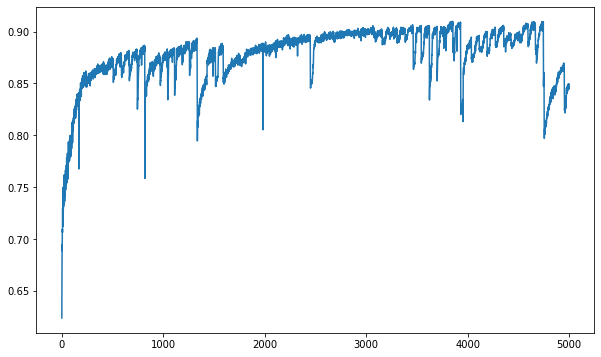

In [ ]:
# pd.DataFrame(h.history)['accuracy'].plot(figsize=(10, 6))

In [ ]:
X, y = extraction(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

param_grid = [
    {'activation': ['logistic', 'relu'], 'hidden_layer_sizes': [5, 10, 30, 50, 70, 100, 120, 150, 180, 200], 
     'max_iter': [2000], 'early_stopping': [True]
     }
]

model = MLPClassifier(random_state = 0)
grid_search = GridSearchCV(model, param_grid, cv = 5,
                          scoring = 'f1',
                          return_train_score = True)
grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for f1, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1, params)


preds_train = grid_search.predict( X_train )
preds_test = grid_search.predict( X_test )

print('the confusion matrix for training set is')
print(confusion_matrix(y_train, preds_train))
print(f1_score(y_train, preds_train))
print('the confusion matrix for testing set is')
print(confusion_matrix(y_test, preds_test))
print(f1_score(y_test, preds_test))

0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 5, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 10, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 30, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 50, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 70, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 100, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 120, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 150, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 180, 'max_iter': 2000}
0.0 {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': 200, 'max_iter': 2000}
0.0 {'

### two year data as input

In [ ]:
def extraction_1(year1, year2):
  new_data = []
  rename = [i + '_' for i in df_all.columns]

  for (stock), _df in df_all.groupby(['permno']):
      if _df.shape[0] >= year2:
        data_year1 = _df.iloc[-year1].drop(['permno', 'yyyymm', 'dlrsn'])
        data_year2 = _df.iloc[-year2]
        data_year2.index = rename
        new_data.append(pd.concat([data_year1, data_year2]))
  new_df = pd.DataFrame(new_data)
  X = new_df.drop(['permno_', 'yyyymm_', 'dlrsn_'], axis = 1)
  y = new_df['dlrsn_']
  return X, y

In [ ]:
X12, y12 = extraction_1(4,5)
X12_ov, y12_ov = oversampling(X12, y12, 0.5)
y12_ov.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X12_ov, y12_ov, test_size=0.3, random_state=0)

param_grid = [
    {'activation': ['relu'], 'hidden_layer_sizes': [10, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, 350, 370, 400], 
     'max_iter': [5000], 'early_stopping': [True]
     }
]

model = MLPClassifier(random_state = 0)
grid_search_1 = GridSearchCV(model, param_grid, cv = 3,
                          scoring = 'f1',
                          return_train_score = True)
grid_search_1.fit(X_train, y_train)

cvres_1 = grid_search_1.cv_results_
for f1, params in zip(cvres_1["mean_test_score"], cvres_1["params"]):
    print(f1, params)

0.7636240556516691 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 10, 'max_iter': 5000}
0.7361269782909222 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 40, 'max_iter': 5000}
0.764667837586169 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 70, 'max_iter': 5000}
0.7581783894189454 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 100, 'max_iter': 5000}
0.7832399192044353 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 130, 'max_iter': 5000}
0.7399261082276768 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 160, 'max_iter': 5000}
0.763447392428397 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 190, 'max_iter': 5000}
0.7594855109106412 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 220, 'max_iter': 5000}
0.7707243421572629 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 250, 'max_iter': 5000}
0.7192

In [ ]:
pd.DataFrame(grid_search_1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_early_stopping,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.742305,1.008824,0.022858,0.001229,relu,True,10,5000,"{'activation': 'relu', 'early_stopping': True,...",0.732868,0.780269,0.777735,0.763624,0.021772,5,0.737644,0.797317,0.774155,0.769705,0.024564
1,3.394797,0.902069,0.029787,0.006993,relu,True,40,5000,"{'activation': 'relu', 'early_stopping': True,...",0.713812,0.750539,0.744030,0.736127,0.016001,13,0.736997,0.766904,0.742247,0.748716,0.013038
2,6.611276,2.351787,0.031215,0.001241,relu,True,70,5000,"{'activation': 'relu', 'early_stopping': True,...",0.745508,0.752680,0.795815,0.764668,0.022218,4,0.738125,0.768090,0.810204,0.772140,0.029565
3,9.310616,4.879209,0.036842,0.006782,relu,True,100,5000,"{'activation': 'relu', 'early_stopping': True,...",0.723020,0.777689,0.773826,0.758178,0.024911,9,0.731117,0.800161,0.787868,0.773048,0.030072
4,8.940207,3.576028,0.033580,0.001096,relu,True,130,5000,"{'activation': 'relu', 'early_stopping': True,...",0.825612,0.742331,0.781776,0.783240,0.034015,1,0.834524,0.765526,0.795490,0.798513,0.028250
5,6.118873,1.093630,0.036504,0.000725,relu,True,160,5000,"{'activation': 'relu', 'early_stopping': True,...",0.752353,0.733231,0.734194,0.739926,0.008796,12,0.768372,0.752739,0.730914,0.750675,0.015362
6,9.918253,4.289766,0.042348,0.002028,relu,True,190,5000,"{'activation': 'relu', 'early_stopping': True,...",0.698894,0.775668,0.815780,0.763447,0.048495,6,0.705102,0.797453,0.833671,0.778742,0.054130
7,11.727824,4.104075,0.041045,0.000616,relu,True,220,5000,"{'activation': 'relu', 'early_stopping': True,...",0.733422,0.796954,0.748080,0.759486,0.027162,7,0.743511,0.818265,0.750877,0.770884,0.033638
8,15.413475,8.013217,0.059241,0.019834,relu,True,250,5000,"{'activation': 'relu', 'early_stopping': True,...",0.749350,0.796523,0.766300,0.770724,0.019511,2,0.759132,0.820564,0.769693,0.783130,0.026819
9,9.481397,1.562901,0.048172,0.001497,relu,True,280,5000,"{'activation': 'relu', 'early_stopping': True,...",0.754936,0.758621,0.644163,0.719240,0.053109,14,0.759217,0.779702,0.675957,0.738292,0.044864


In [ ]:
preds_train = grid_search_1.predict( X_train )
preds_test = grid_search_1.predict( X_test )

print('the confusion matrix for training set is')
print(confusion_matrix(y_train, preds_train))
print(f1_score(y_train, preds_train))
print('the confusion matrix for testing set is')
print(confusion_matrix(y_test, preds_test))
print(f1_score(y_test, preds_test))

the confusion matrix for training set is
[[6184 1010]
 [ 987 2615]]
0.7236751072367511
the confusion matrix for testing set is
[[2592  497]
 [ 460 1079]]
0.6927768860353131


In [ ]:
X12, y12 = extraction_1(4,5)

X_train, X_test, y_train, y_test = train_test_split(X12, y12, test_size=0.3, random_state=0)

param_grid = [
    {'activation': ['relu'], 'hidden_layer_sizes': [10, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, 350, 370, 400], 
     'max_iter': [5000], 'early_stopping': [True]
     }
]

model = MLPClassifier(random_state = 0)
grid_search_1 = GridSearchCV(model, param_grid, cv = 3,
                          scoring = 'f1',
                          return_train_score = True)
grid_search_1.fit(X_train, y_train)

cvres_1 = grid_search_1.cv_results_
for f1, params in zip(cvres_1["mean_test_score"], cvres_1["params"]):
    print(f1, params)

preds_train = grid_search_1.predict( X_train )
preds_test = grid_search_1.predict( X_test )

print('the confusion matrix for training set is')
print(confusion_matrix(y_train, preds_train))
print(f1_score(y_train, preds_train))
print('the confusion matrix for testing set is')
print(confusion_matrix(y_test, preds_test))
print(f1_score(y_test, preds_test))

0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 10, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 40, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 70, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 100, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 130, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 160, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 190, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 220, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 250, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 280, 'max_iter': 5000}
0.0 {'activation': 'relu', 'early_stopping'

### sequential -- LSTM

In [ ]:
def extraction_2(n_year):

  data_firm_char=[]
  data_firm_name=[]
  data_firm_default=[]

  for (stock), _df in df_all.groupby(['permno']):
      if _df.shape[0] >= n_year:
          data_firm_name.append([stock,_df['yyyymm']])
          data_firm_char.append(_df.iloc[-n_year:,3:])
          data_firm_default.append(_df.iloc[-1,2])

  data_firm_char = np.asarray(data_firm_char)
  data_firm_name = np.asarray(data_firm_name)
  data_firm_default = np.asarray(data_firm_default)

  # print(data_firm_char.shape)
  # print(data_firm_name.shape)
  # print(data_firm_default.shape)

  return data_firm_char, data_firm_default

(10467, 5, 204)
(10467,)


0    10290
1      177
dtype: int64

# Simple example of forecasting financial distress

In [ ]:
import os
from os import listdir
import random
import tqdm
import numpy as np
import pandas as pd

import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras import backend as K

from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
from scipy import stats

from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix
from scipy import stats
import scipy.cluster.hierarchy as sch

%matplotlib inline

# These options determine the way floating point numbers are displayed.
np.set_printoptions(precision=4, suppress=True)

tf.random.set_seed(100)

np.__version__

'1.21.6'

In [ ]:
### READ DATASET ###

from google.colab import drive

# mount the Google drive as a path that you can work on 
drive.mount('/drive')

df = pd.read_csv('/drive/My Drive/Colab Notebooks/Data/all_predrs_tic_permno_dlrsn.csv')
df_merge_all = df.copy()
df_merge_all.head()
df_merge_all.drop('Unnamed: 0', axis=1, inplace=True)

# remove tic, fyear
df_merge_all.drop(['tic','fyear'], axis=1, inplace=True)

# change dlrsn value
df_merge_all.loc[df_merge_all['dlrsn']==2, 'dlrsn'] = 3 
df_merge_all.loc[df_merge_all['dlrsn']!=3, 'dlrsn'] = 0
df_merge_all.loc[df_merge_all['dlrsn']==3, 'dlrsn'] = 1
df_merge_all['dlrsn'].value_counts()

# just to show some data
print(df_merge_all.iloc[0:5,])

data_firm_char=[]
data_firm_name=[]
data_firm_default=[]
for (stock), _df in df_merge_all.groupby(['permno']):
    if _df.shape[0]>=5:
        data_firm_name.append([stock,_df['yyyymm']])
        data_firm_char.append(_df.iloc[-5:,3:])
        data_firm_default.append(_df.iloc[-1,2])

type(data_firm_char)

data_firm_char = np.asarray(data_firm_char)
data_firm_name = np.asarray(data_firm_name)
data_firm_default = np.asarray(data_firm_default)

print(data_firm_char.shape)
print(data_firm_name.shape)
print(data_firm_default.shape)

print(data_firm_char[0,:,0:6])
print(data_firm_default[0])

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
   permno  yyyymm  dlrsn  zerotradeAlt12  zerotradeAlt1   zerotrade    XFIN  \
0   10001  200912      0      2.3864e-01     8.2785e-08  1.5909e-01 -0.0010   
1   10001  201012      0      4.1507e-08     1.0000e-08  4.6761e-08 -0.0290   
2   10001  201212      0      6.3341e-08     4.0704e-08  5.4645e-08  0.0261   
3   10001  201312      0      4.0206e-08     8.2144e-09  2.6326e-08  0.0490   
4   10001  201412      0      1.8908e-08     4.7850e-08  2.3953e-08  0.0544   

   VolumeTrend   VolSD  VolMkt  ...  AnalystValue  AnalystRevision      AM  \
0      -0.0083  0.1415  0.0365  ...        0.6469           1.0000  1.6879   
1       0.0376  0.2373  0.0472  ...        0.6469           1.0000  0.9540   
2       0.0168  0.1930  0.0411  ...        0.5424           1.0000  2.0552   
3       0.0299  0.5262  0.0987  ...        0.6469           1.0714  2.0787   
4       0.0332  0.7956

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
## construct a LSTM 
num_step, num_fea = data_firm_char.shape[1:]

n_neurons = int(num_fea*0.5)
n_neurons_2 = int(n_neurons*0.6)
n_batch = data_firm_char.shape[0]
n_epoch = 100

model = Sequential()
model.add(LSTM(n_neurons, input_shape=(num_step, num_fea)))
# if more layers to be added:
# model.add(LSTM(n_neurons, input_shape=(num_step, num_fea), return_sequences=True))
# model.add(LSTM(n_neurons_2))
model.add(Dense(1))
model.compile( loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 102)               125256    
                                                                 
 dense_3 (Dense)             (None, 1)                 103       
                                                                 
Total params: 125,359
Trainable params: 125,359
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit( data_firm_char, data_firm_default, epochs=n_epoch, batch_size=n_batch )

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.3443 - acc: 0.9434
Epoch 2/100
1/1 [==============================] - 1s 749ms/step - loss: 0.2759 - acc: 0.9814
Epoch 3/100
1/1 [==============================] - 1s 753ms/step - loss: 0.2640 - acc: 0.9821
Epoch 4/100
1/1 [==============================] - 1s 952ms/step - loss: 0.2629 - acc: 0.9823
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.2626 - acc: 0.9823
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.2624 - acc: 0.9823
Epoch 7/100
1/1 [==============================] - 1s 793ms/step - loss: 0.2624 - acc: 0.9823
Epoch 8/100
1/1 [==============================] - 1s 772ms/step - loss: 0.2623 - acc: 0.9823
Epoch 9/100
1/1 [==============================] - 1s 746ms/step - loss: 0.2622 - acc: 0.9824
Epoch 10/100
1/1 [==============================] - 1s 739ms/step - loss: 0.2622 - acc: 0.9824
Epoch 11/100
1/1 [==============================] - 1s 746ms/step - 

In [ ]:
# testing, performance is terrible

result = model.predict(data_firm_char, batch_size=n_batch )
default_pred = np.where(result.flatten()>0.5,1,0)

print(confusion_matrix( data_firm_default , default_pred ))
print(classification_report(data_firm_default , default_pred))


[[10290     0]
 [  177     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10290
           1       0.00      0.00      0.00       177

    accuracy                           0.98     10467
   macro avg       0.49      0.50      0.50     10467
weighted avg       0.97      0.98      0.97     10467



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#### install AutoGluon ####
!pip install autogluon  # autogluon==0.3.1
from autogluon.tabular import TabularDataset, TabularPredictor


In [ ]:
# df_merge_all

df_merge_all_char = df_merge_all.copy()
df_merge_all_char.head()
df_merge_all_char.drop(['permno','yyyymm'], axis=1, inplace=True)

train_data_tab = TabularDataset(df_merge_all_char)
label = 'dlrsn'
# fit the data
predictor = TabularPredictor(label=label).fit( train_data_tab )



No path specified. Models will be saved in: "AutogluonModels/ag-20220420_122601/"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220420_122601/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    153385
Train Data Columns: 204
Label Column: dlrsn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the

In [ ]:

# test
preds = predictor.predict(train_data_tab)
preds_result = pd.DataFrame( [preds,df_merge_all['dlrsn']], columns=['Pred_Default','Default'] )
preds_result = pd.DataFrame({ 'Pred_Default':preds, 'Default':df_merge_all['dlrsn'] })

print(classification_report(np.asarray(df_merge_all['dlrsn']), preds))

print(predictor.feature_importance(train_data_tab))

Computing feature importance via permutation shuffling for 204 features using 1000 rows with 3 shuffle sets...


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    150706
           1       0.89      0.47      0.61      2679

    accuracy                           0.99    153385
   macro avg       0.94      0.73      0.80    153385
weighted avg       0.99      0.99      0.99    153385



	124.65s	= Expected runtime (41.55s per shuffle set)
	36.78s	= Actual runtime (Completed 3 of 3 shuffle sets)


                  importance  stddev  p_value  n  p99_high     p99_low
zerotrade             0.0033  0.0012   0.0189  3    0.0099 -3.2832e-03
MaxRet                0.0033  0.0006   0.0049  3    0.0066  2.5052e-05
zerotradeAlt1         0.0027  0.0015   0.0471  3    0.0114 -6.0862e-03
High52                0.0027  0.0006   0.0076  3    0.0060 -6.4161e-04
Illiquidity           0.0023  0.0023   0.1111  3    0.0156 -1.0900e-02
...                      ...     ...      ... ..       ...         ...
REV6                  0.0000  0.0000   0.5000  3    0.0000  0.0000e+00
AbnormalAccruals      0.0000  0.0000   0.5000  3    0.0000  0.0000e+00
ReturnSkew3F         -0.0003  0.0006   0.7887  3    0.0030 -3.6416e-03
Mom12m               -0.0003  0.0006   0.7887  3    0.0030 -3.6416e-03
SmileSlope           -0.0003  0.0006   0.7887  3    0.0030 -3.6416e-03

[204 rows x 6 columns]
